##  Q6 UCI-HAR dataset. Compare DT, RF and Linear regression (yes, regression). For linear regression: each class label as an integer value. Say, 1: Sitting, 2:..., and so on. Use features extracted (from flattened out Linear Acceleration) using the TSFEL library. Compare the performance of these models. Is the usage of linear regression for classification justified? Why or why not?

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

## Importing features dataset created in assignment 1 for UCI-HAR dataset

In [2]:
X_train=pd.read_csv('X_train.csv')
y_train=np.genfromtxt('y_train.csv')
X_test=pd.read_csv('X_test.csv')
y_test=np.genfromtxt('y_test.csv')


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(144, 168)
(144,)
(36, 168)
(36,)


In [4]:
label_names=[
    'walking',
    'walking_upstairs',
    'walking_downstairs',
    'sitting',
    'standing',
    'laying'
]

## Training decision tree

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Testing on UCI test dataset

Decision Tree Model Performance:
Accuracy: 0.8889
Precision: 0.9048
Recall: 0.8889
F1 Score: 0.8897
Confusion Matrix:

Confusion Matrix:


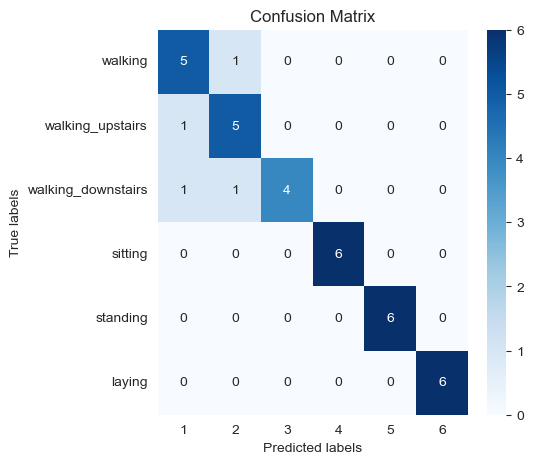

In [18]:
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro', zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print("Confusion Matrix:")
print("\nConfusion Matrix:")

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=label_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Training RandomForest model

In [7]:
clf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=100)

## Testing on UCI test dataset

Accuracy: 0.9444
Precision: 0.9484
Recall: 0.9444 
F1 Score: 0.9443 

Confusion Matrix:


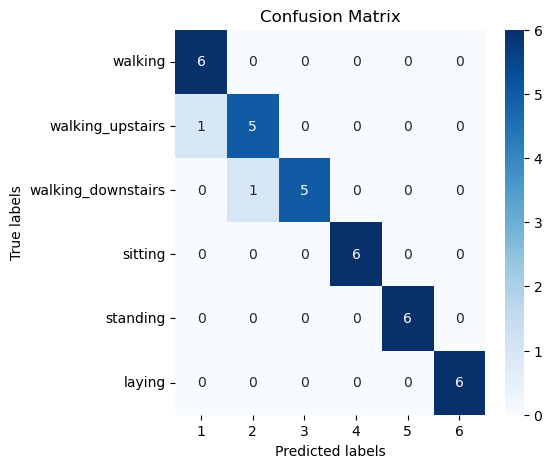

In [8]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0) 
recall = recall_score(y_test, y_pred, average='macro') 
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f} ")
print(f"F1 Score: {f1:.4f} ")
print("\nConfusion Matrix:")

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=label_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Training linear regression model

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train)
X_test_lr = scaler.transform(X_test)


In [10]:
lr = LinearRegression()
lr.fit(X_train_lr, y_train)

LinearRegression()

In [11]:
y_pred_lr = lr.predict(X_test_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R-squared (R2): {r2_lr:.4f}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 12.8874
Mean Squared Error (MSE): 494.5970
Root Mean Squared Error (RMSE): 22.2395
R-squared (R2): -168.5761


In [12]:
y_pred_lr

array([-17.57280605, -12.0309685 ,   7.73856127,   7.62837343,
         6.69203094,   4.96706233,   3.84668729, -57.02928537,
        23.82067086,  -2.01328548,   5.57412275,   5.23458211,
        34.52375733,  10.23629117,  21.02954153,   6.13645768,
         4.95400476,   6.42579922,  16.94949714,   6.15944944,
        13.61846571,  11.35994705,  -2.20838614,   4.73731595,
         5.1175236 ,  43.9366143 , -75.94074625,   5.08628764,
        18.52121423,   3.34061985,   3.08363065,   4.06018304,
         5.04218602, -44.16776679,  22.17833331,  21.48505839])

In [13]:
y_pred_rounded = np.rint(y_pred_lr)

accuracy_lr = accuracy_score(y_test, y_pred_rounded)
print(f"Linear Regression 'Accuracy': {accuracy_lr:.4f}")


Linear Regression 'Accuracy': 0.1389


---

### Comparison of Decision Tree (DT), Random Forest (RF), and Linear Regression (LR) 

Utilizing features extracted via the TSFEL library, we compare the performance of three models: Decision Tree, Random Forest, and Linear Regression. Below is a detailed evaluation:

### **Decision Tree (DT)**
- **Accuracy:** 0.8889
- **Precision:** 0.9048
- **Recall:** 0.8889
- **F1 Score:** 0.8897

DT showed commendable performance, with a well-balanced precision and recall. Despite some misclassifications, the confusion matrix illustrates a relatively balanced prediction across classes.

### **Random Forest (RF)**
- **Accuracy:** 0.9444
- **Precision:** 0.9484
- **Recall:** 0.9444
- **F1 Score:** 0.9443

RF surpassed DT in all metrics, underlining its effectiveness in this classification task. The higher scores across the board denote a robust and highly generalizable model. The confusion matrix further confirms its superior predictive capability, with minimal misclassifications.

### **Linear Regression (LR)**
- **Mean Absolute Error (MAE):** 12.8874
- **Mean Squared Error (MSE):** 494.5970
- **Root Mean Squared Error (RMSE):** 22.2395
- **R-squared (R2):** -168.5761
- **'Accuracy' (post rounding):** 0.1389

Applying LR to a classification task showcased its inadequacy, as reflected by poor performance metrics. The notably negative R-squared value suggests the model's predictive capability is significantly worse than a naive mean-based prediction. The 'accuracy', derived by rounding regression outputs, further emphasizes LR's unsuitability for classification purposes, starkly contrasting with the performances of DT and RF.

---


### Is it justified to use linear regression for classification task?

<b>Integral Class Labels</b>: In cases where classes are encoded as integers (e.g., 1, 2, 3, etc.), Linear Regression might interpret the problem as having an ordinal nature, implying that class 3 is somehow "more" of something than class 2 or 1. This interpretation is incorrect for nominal classes where no such ordinal relationship exists. For example, in the UCI HAR dataset, class labels represent activities like walking, sitting, or standing, which do not have a meaningful order that would justify a higher or lower numerical value.

<b>Output Interpretation</b>: Linear Regression outputs continuous values that don't map directly to class labels without additional steps (e.g., rounding or thresholding). These steps introduce arbitrary decision boundaries that may not reflect the true nature of the data.

<b>Model Assumptions</b>: Linear Regression assumes a linear relationship between features and the target variable. This assumption may not hold in classification problems where the decision boundary between classes can be non-linear or more complex.

<b>Sensitivity to Imbalance</b>: Linear regression can be disproportionately affected by outliers or imbalanced data, skewing predictions.

<b>Lack of Class Boundary Optimization</b>: Unlike classification algorithms, linear regression does not optimize for class boundaries, leading to poor performance on classification tasks.

The comparison clearly demonstrates that for classification tasks, especially with categorical outcomes like in the UCI-HAR dataset, models designed for classification (such as DT and RF) significantly outperform regression models not inherently suited for predicting discrete labels. Linear regression's poor performance underscores the importance of choosing an appropriate model based on the nature of the prediction task.

### Q7 Obtain the weights (take absolute values as weights can also be negative) of the linear regression model. Also, obtain the feature importance from the Random Forest model. Plot the weights obtained as a Bar plot. This will help you visualize what features are being prioritized by the models. Note that sum of feature importances for a Random Forest model is 1. you will have to bring the linear regression weights to the same scale. To do so you can divide the weights by the sum of all the weights. Plot the importance of the features in the same plot. Figure out the top 10 important features obtained from both the models and display their names. What do you infer?

### Obtaining and normalizing weights for linear regression

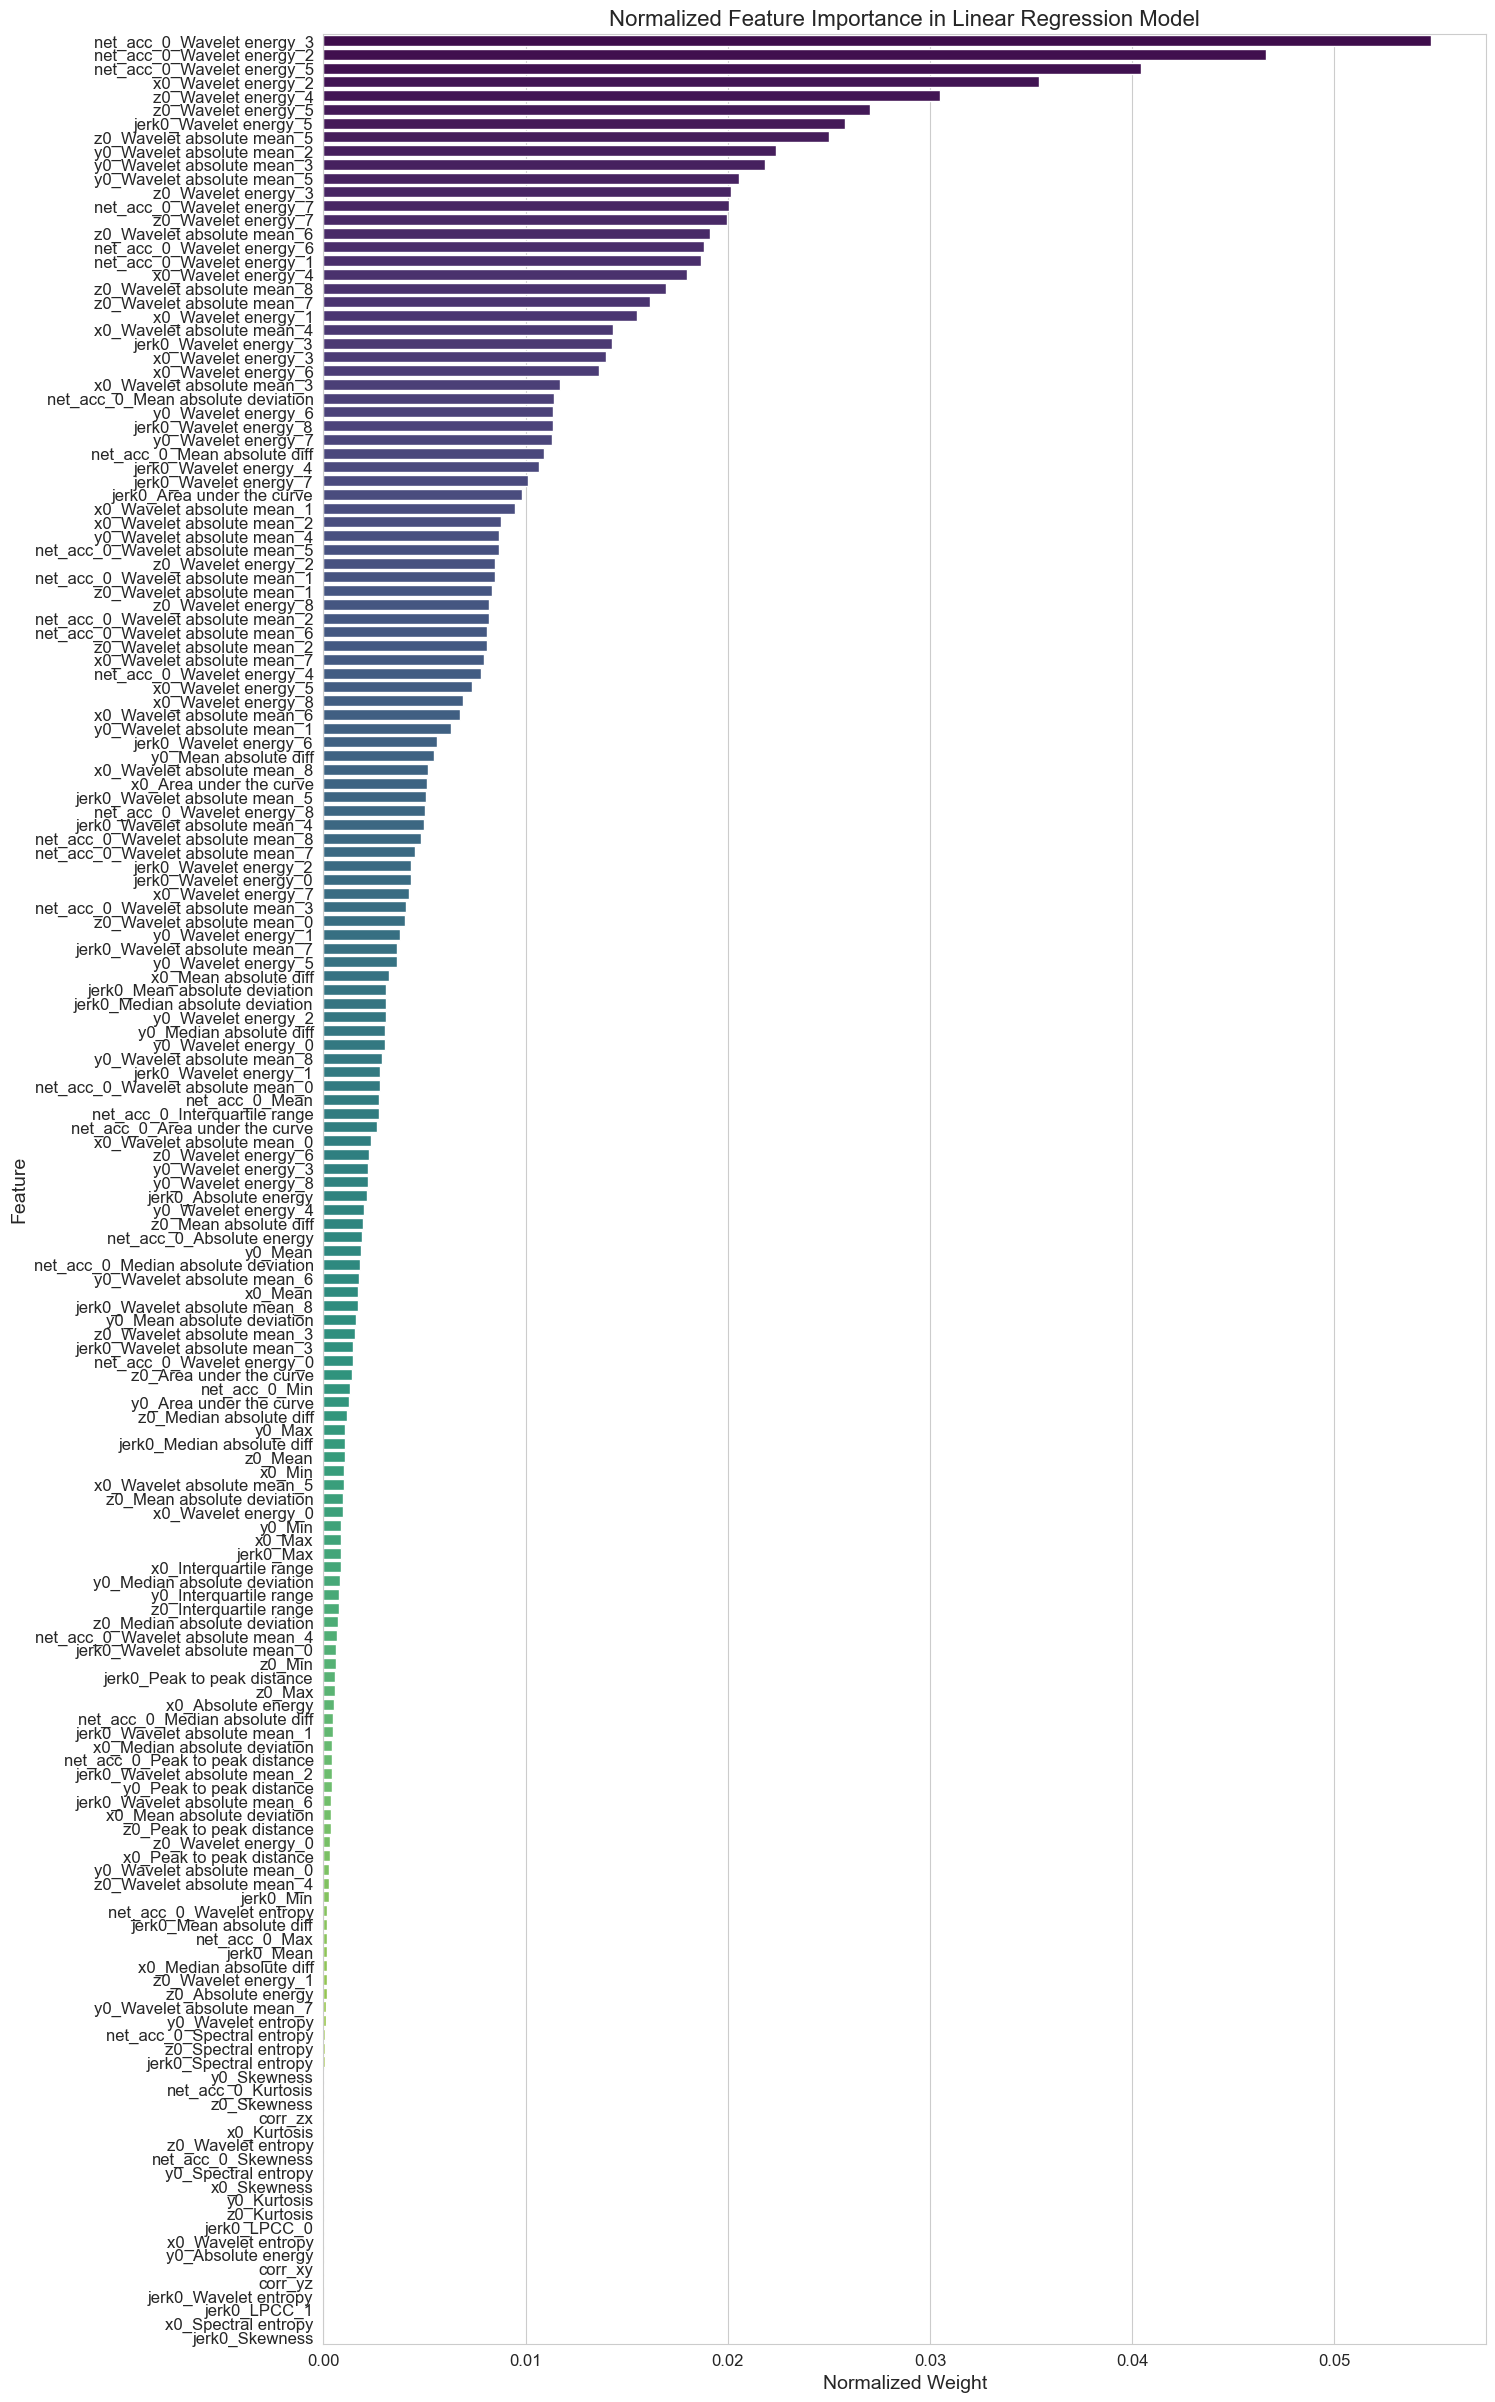

In [14]:
weights = np.abs(lr.coef_)
normalized_weights = weights / np.sum(weights)
sorted_idx = np.argsort(normalized_weights)[::-1]
top_x_idx = sorted_idx[:168]

feature_names = X_train.columns[top_x_idx]

plt.figure(figsize=(15, 30))

sns.set_style("whitegrid")

sns.barplot(x=normalized_weights[top_x_idx], y=feature_names, palette="viridis")

plt.xlabel('Normalized Weight', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Normalized Feature Importance in Linear Regression Model', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


### Feature importance for random forest model

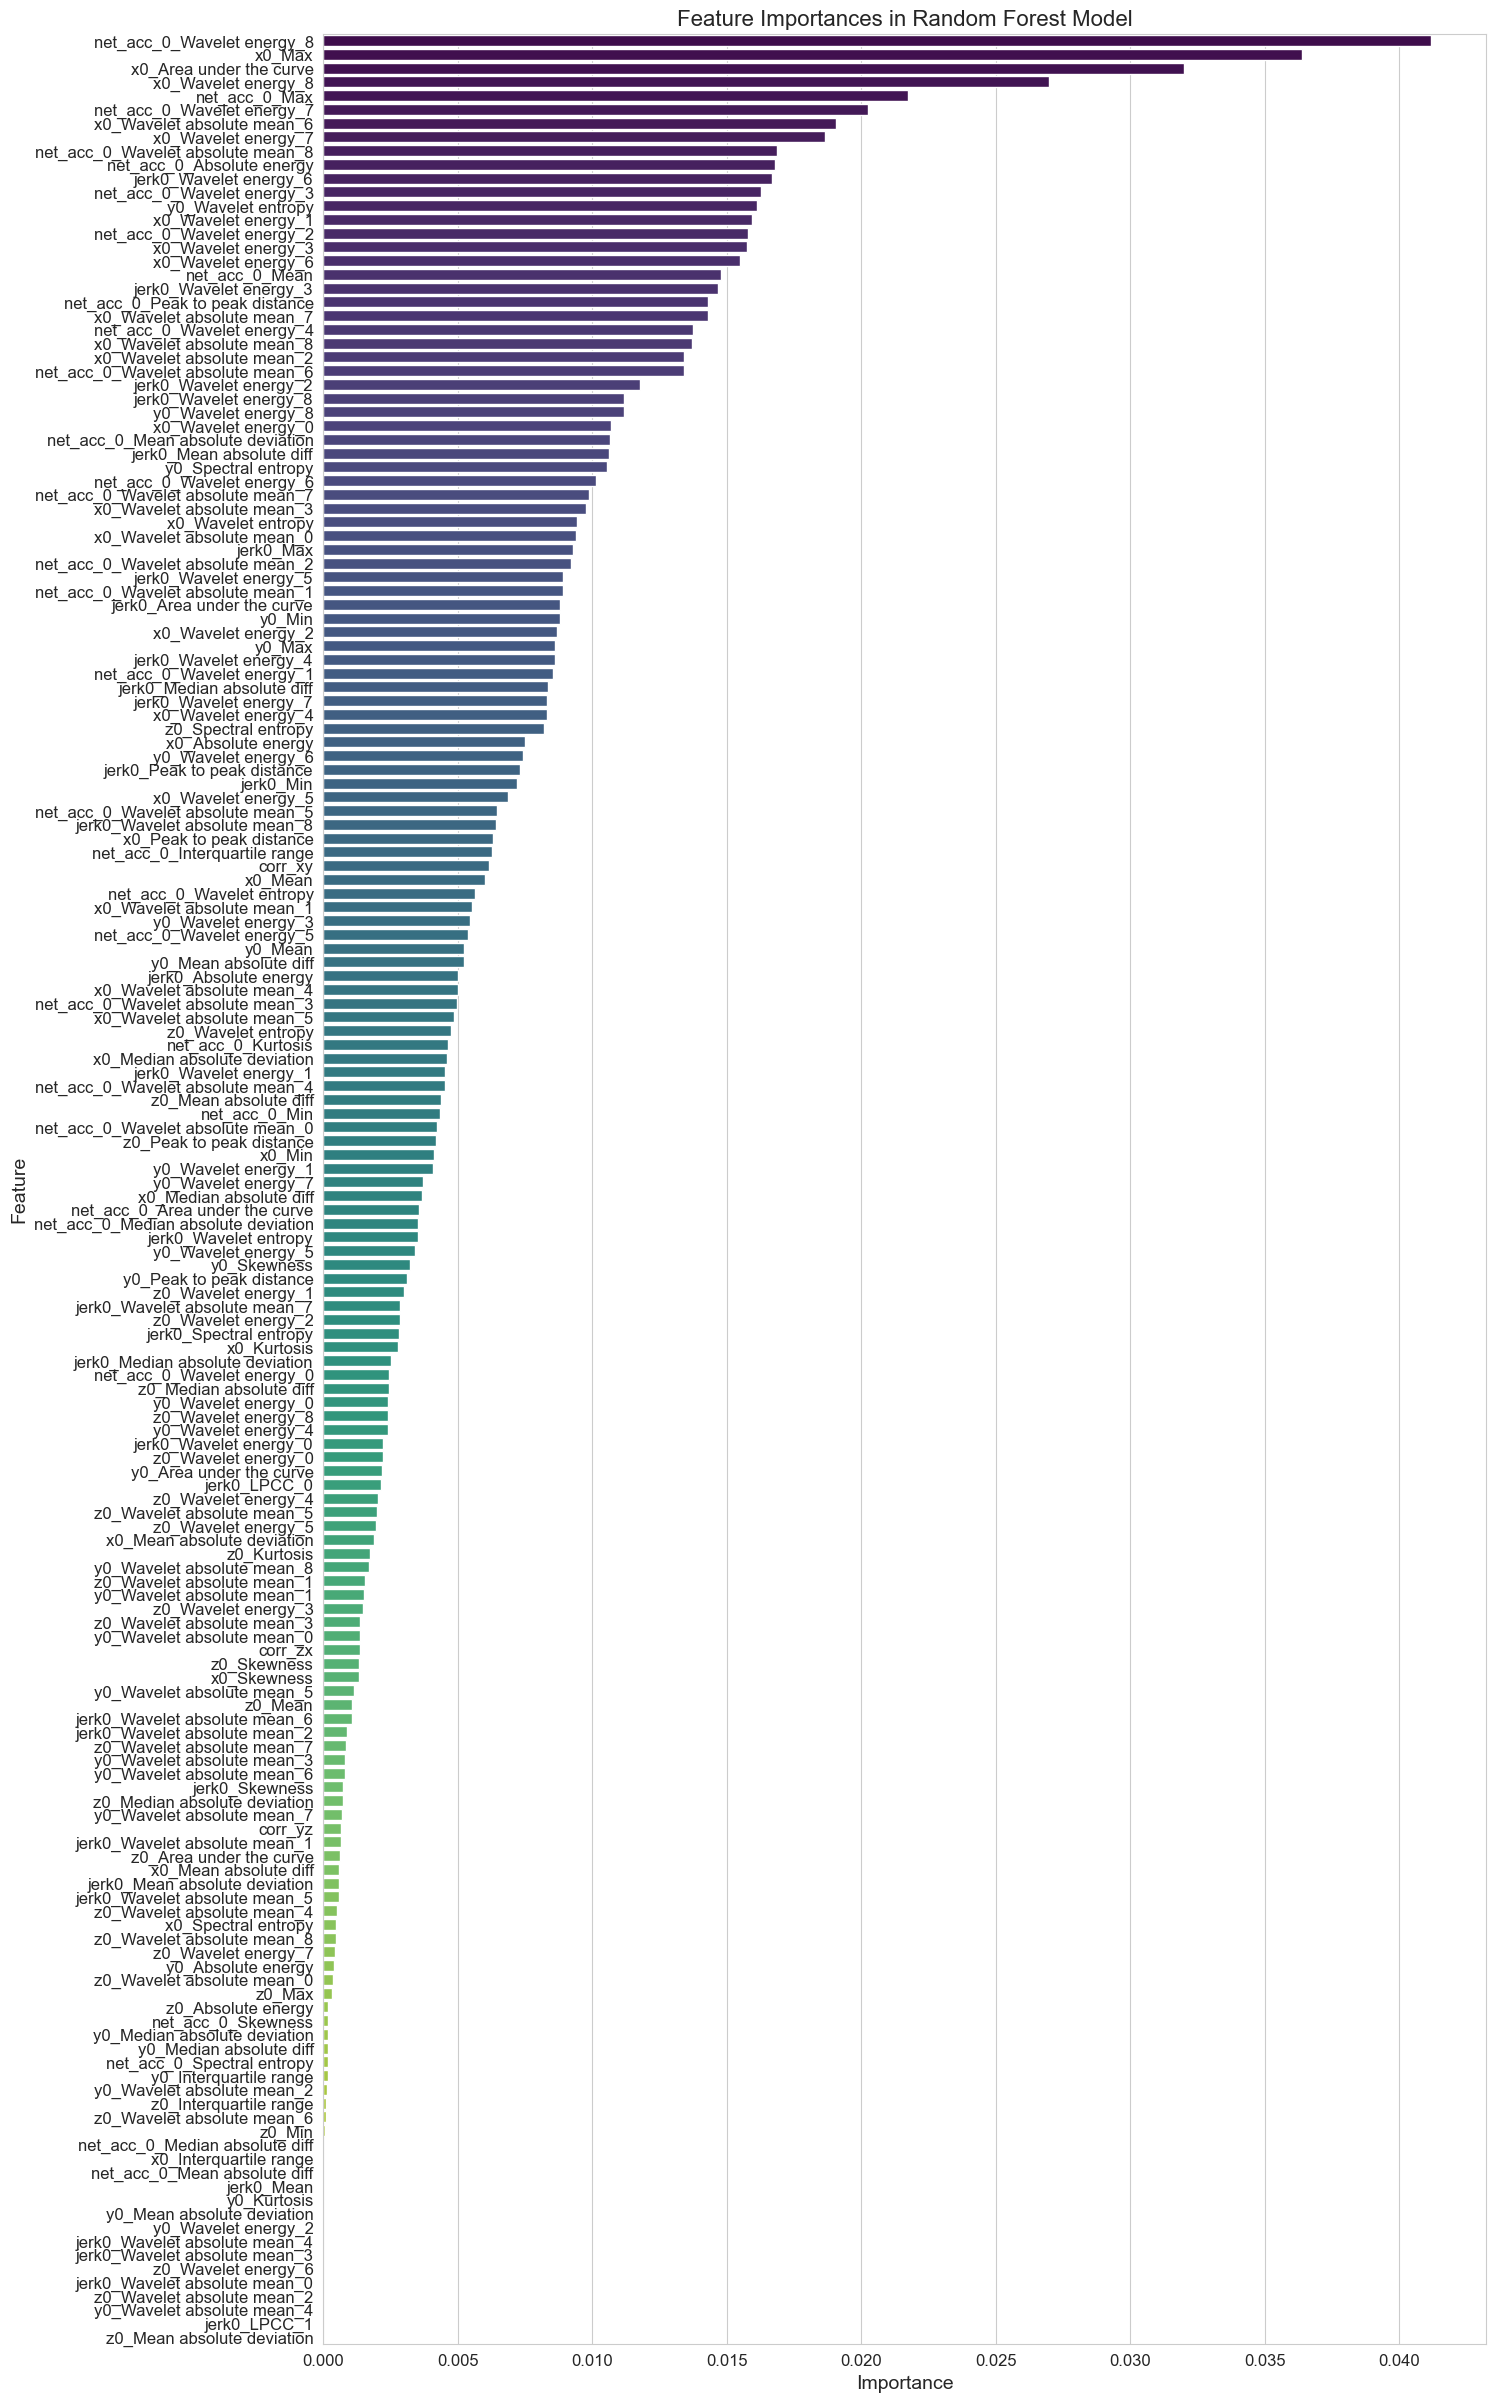

In [15]:
feature_importances = clf.feature_importances_
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 30))
sns.set_style("whitegrid")
sns.barplot(x='Importance', y='Feature', data=features_df[:168], palette="viridis")
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importances in Random Forest Model', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Feature importance for both models in the same plot

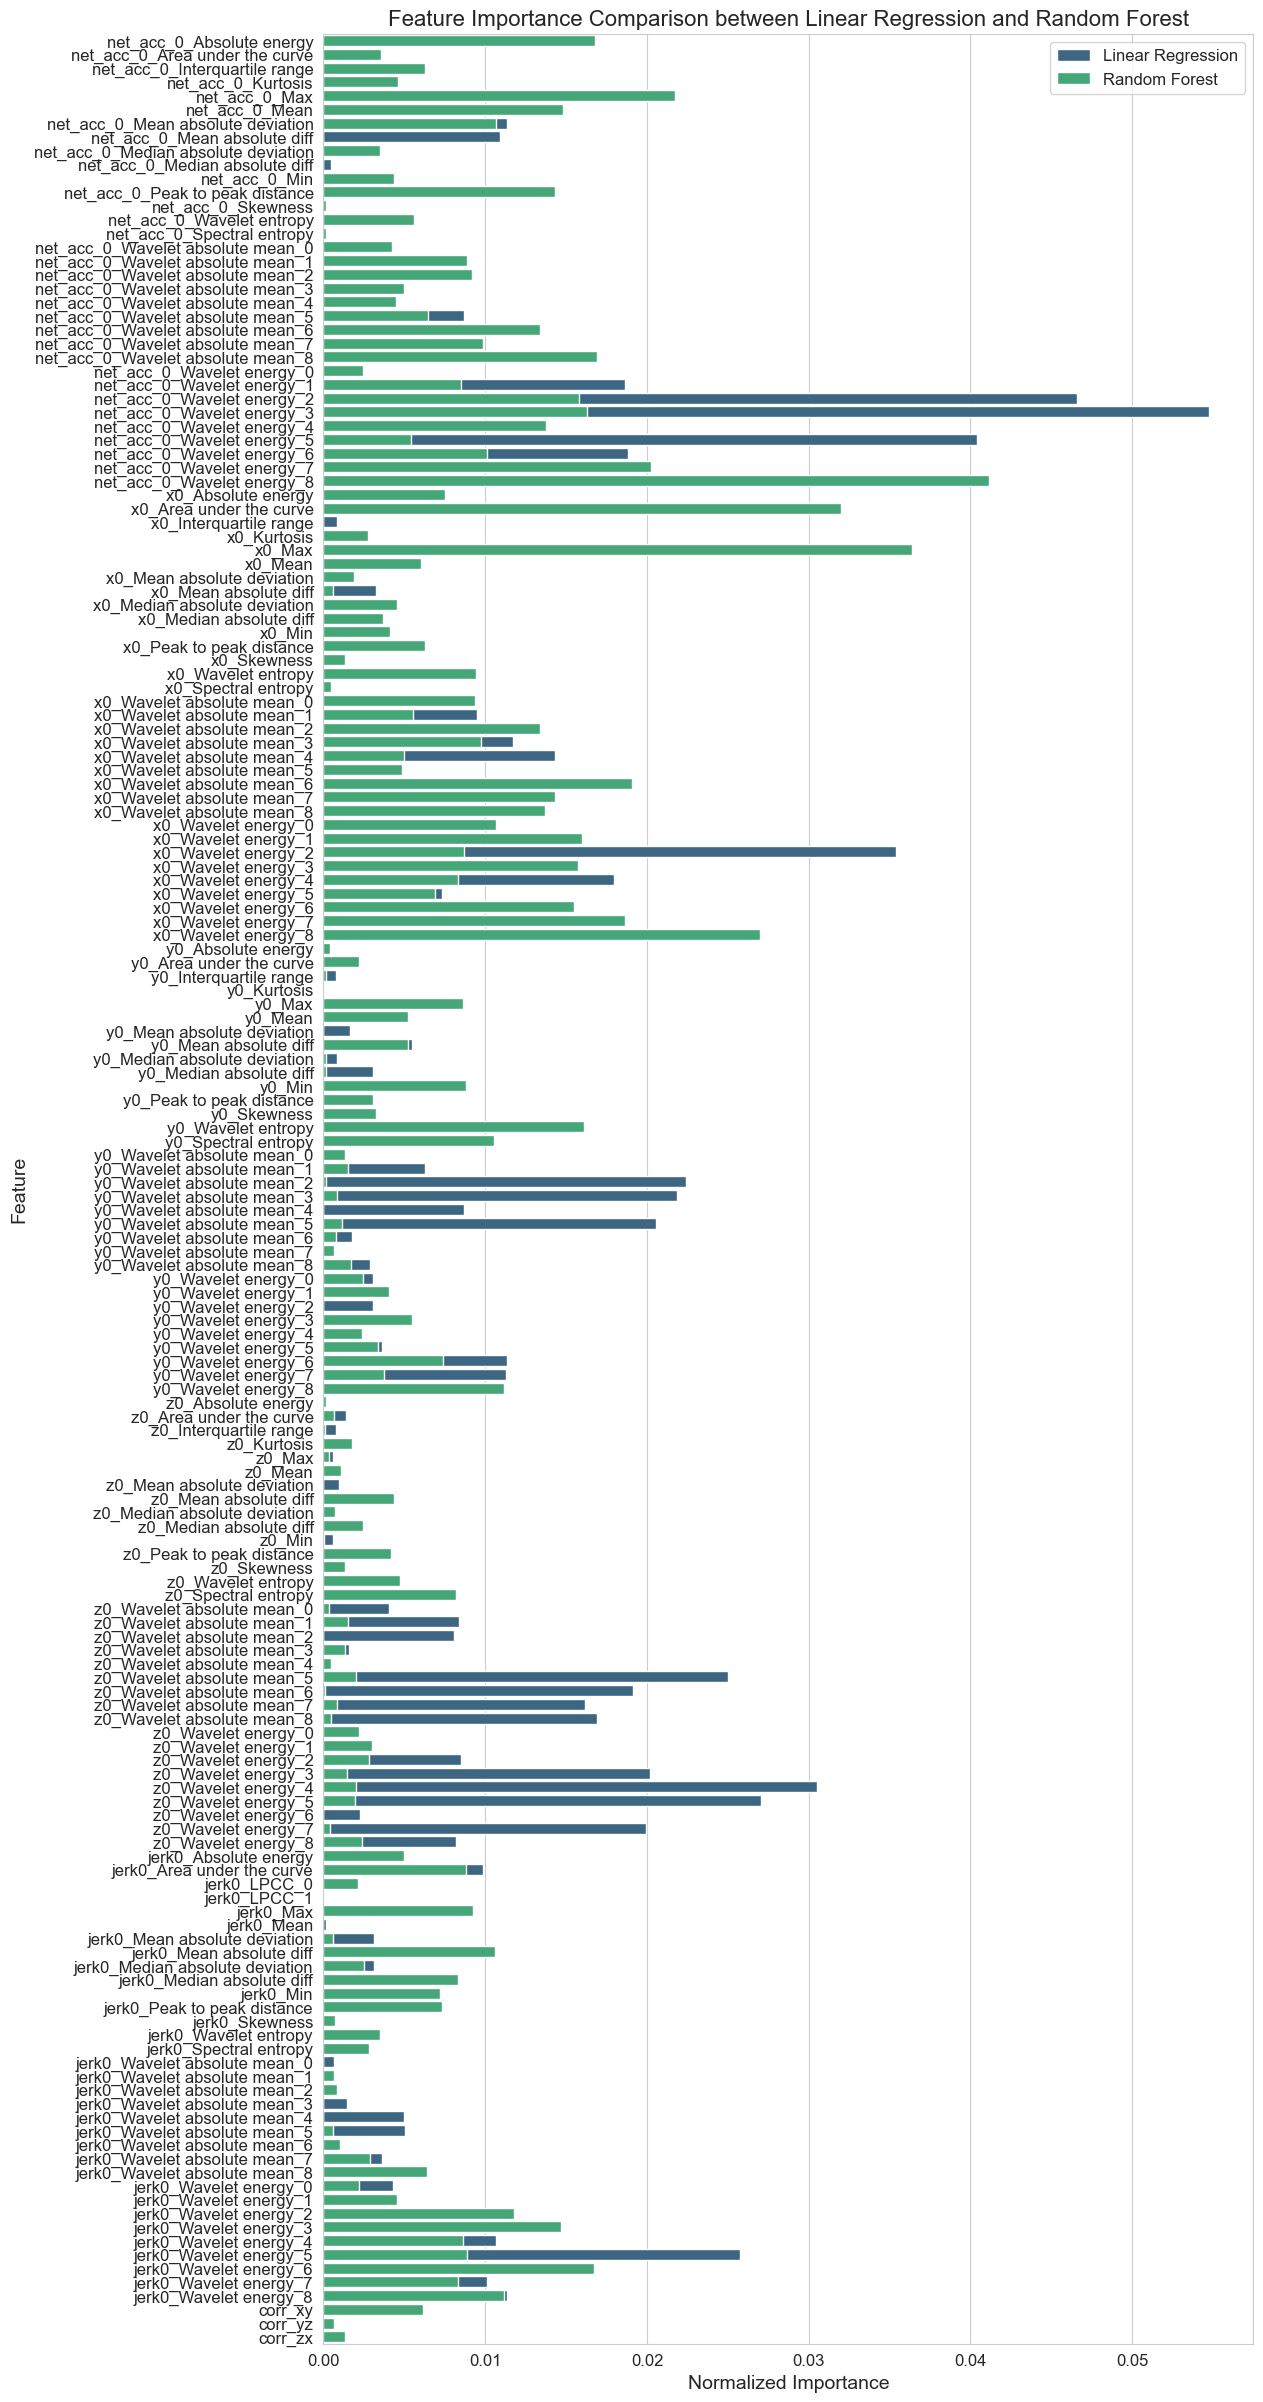

In [16]:
rf_normalized_importances = clf.feature_importances_ / np.sum(clf.feature_importances_)
lr_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': normalized_weights,
    'Model': 'Linear Regression'
})

rf_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_normalized_importances,
    'Model': 'Random Forest'
})

combined_importances_df = pd.concat([lr_importances_df, rf_importances_df])

plt.figure(figsize=(12, 30))
sns.barplot(x='Importance', y='Feature', hue='Model', data=combined_importances_df,
            palette='viridis', dodge=False)

plt.title('Feature Importance Comparison between Linear Regression and Random Forest', fontsize=16)
plt.xlabel('Normalized Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


### Top 10 features for both the models

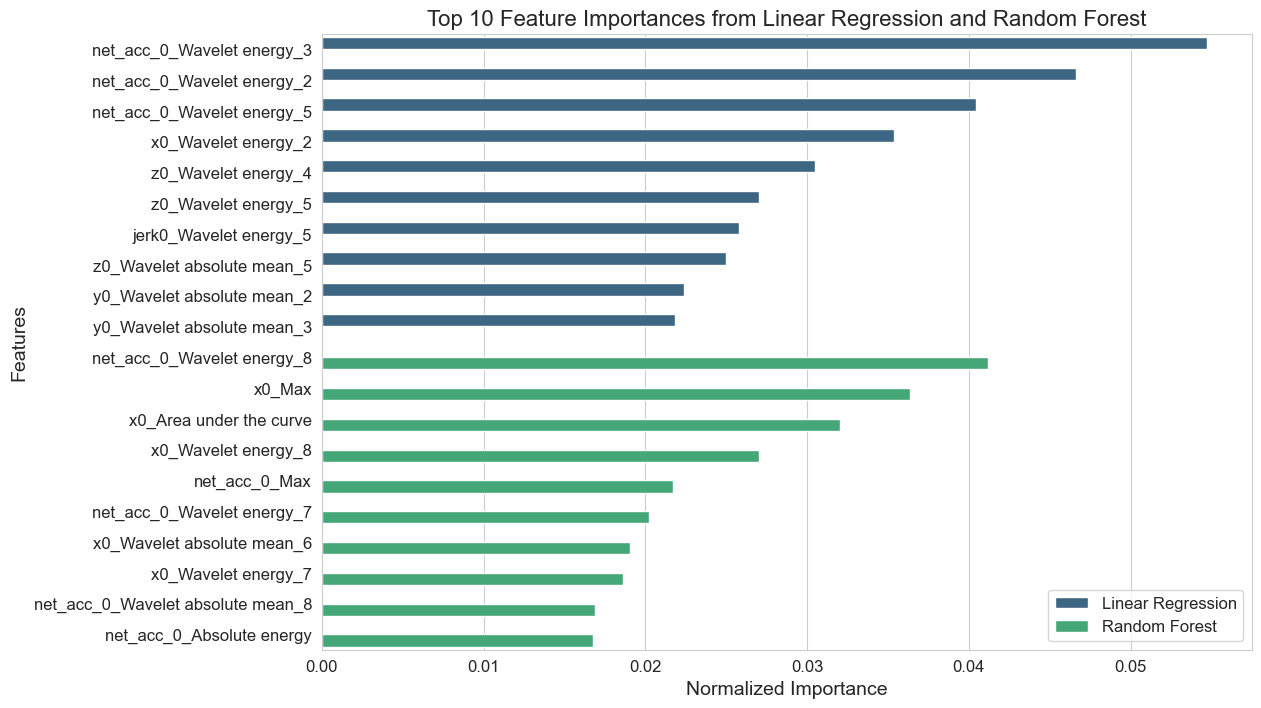

In [17]:
lr_importances = normalized_weights[sorted_idx][:10]
rf_importances = features_df.iloc[:10]['Importance'].values
df_plot = pd.DataFrame({
    'Feature': np.concatenate([feature_names[:10], features_df.iloc[:10]['Feature'].values]),
    'Importance': np.concatenate([lr_importances, rf_importances]),
    'Model': ['Linear Regression']*10 + ['Random Forest']*10
})
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Model', data=df_plot, palette='viridis')

plt.title('Top 10 Feature Importances from Linear Regression and Random Forest', fontsize=16)
plt.xlabel('Normalized Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


### Inference

<b>Different Feature Sets</b>: The two models have identified largely distinct sets of top features, with no apparent overlap in the top 10 features listed. This suggests that the models may be leveraging different aspects of the data to make predictions. Linear Regression seems to focus on features related to "Wavelet energy" and "Wavelet absolute mean" across various signals, while Random Forest identifies a mix of "Wavelet energy," "Max," "Area under the curve," and "Absolute energy" features, indicating a diverse set of criteria for feature importance.

<b>Feature Engineering Importance</b>: The presence of "Wavelet" related features in both models' top lists underscores the potential value of feature engineering, especially time-frequency analysis methods like Wavelet transforms, in extracting informative features from time series data such as the UCI HAR dataset. It highlights the models' sensitivity to how data is represented.

<b>Model-Specific Interpretations</b>: The difference in top features reflects the inherent differences in how Linear Regression and Random Forest models interpret and use the data. Linear Regression, being a global model, assumes a linear relationship between features and the target. In contrast, Random Forest can capture non-linear relationships and interactions between features without explicitly modeling them, which might explain its broader set of top features.